Pembelajaran Mesin Dasar
1. Danisa Ariatna Putri(23031554048)
2. Metha Nailis Sa'adah (23031554159)

# Data Cleaning

library yang digunakan

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

membaca file

In [ ]:
df = pd.read_csv('/content/Autism Screening.csv')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country_of_res,used_app_before,result,age_desc,relation,class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


mengecek nilai nul

In [ ]:
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


menampilkan info terkait kolom data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  autism           704 non-null    object
 15  country_of_res   704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

mengecek terdapat kolom apa saja dalam datasetnya

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'class/ASD'],
      dtype='object')

mengecek nilai unik pada tiap kolom

In [ ]:
for col in df.columns:
    print(f"Nilai unik untuk kolom '{col}':")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Nilai unik untuk kolom 'A1_Score':
A1_Score
1    508
0    196
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A2_Score':
A2_Score
0    385
1    319
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A3_Score':
A3_Score
0    382
1    322
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A4_Score':
A4_Score
0    355
1    349
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A5_Score':
A5_Score
0    353
1    351
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A6_Score':
A6_Score
0    504
1    200
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A7_Score':
A7_Score
0    410
1    294
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A8_Score':
A8_Score
1    457
0    247
Name: count, dtype: int64
---------

mendrop baris jika pada kolom umur terdapat nan

In [ ]:
df = df[df['age'] != '?']

mengubah nilai unik

In [ ]:
cols = ['ethnicity', 'relation']
df[cols] = df[cols].replace('?', 'Others')

<ipython-input-8-045b631bb7d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].replace('?', 'Others')


In [ ]:
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

<ipython-input-9-191602d1522a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ethnicity'] = df['ethnicity'].replace('others', 'Others')


In [ ]:
df['age'] = df['age'].replace('383', '38')

<ipython-input-10-510b3b9aaafb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].replace('383', '38')


menghapus tanda atau karakter yang tidak perlu

In [ ]:
df = df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)
df

<ipython-input-11-e42e674888d7>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country_of_res,used_app_before,result,age_desc,relation,class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,no,no,Egypt,no,2,18 and more,Others,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,Others,no,no,Russia,no,7,18 and more,Others,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


#

drop kolom yang tidak perlu

In [ ]:
df.drop(['ethnicity', 'country_of_res', 'used_app_before', 'age_desc', 'relation'], axis=1, inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,autism,result,class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,no,yes,6,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,no,no,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,no,no,7,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,no,no,3,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,no,no,7,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,no,no,6,NO


simpan dalam csv baru

# Preprocessing

mengubah huruf menjadi kecil semua

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-13-614eaff662ae>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


melakukan encode

In [ ]:
df['gender'] = df['gender'].replace({'m': 1, 'f': 0})
df['jundice'] = df['jundice'].replace({'yes': 1, 'no': 0})
df['autism'] = df['autism'].replace({'yes': 1, 'no': 0})
df['class/ASD'] = df['class/ASD'].replace({'yes': 1, 'no': 0})

<ipython-input-14-f5d84988c061>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'m': 1, 'f': 0})
<ipython-input-14-f5d84988c061>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['jundice'] = df['jundice'].replace({'yes': 1, 'no': 0})
<ipython-input-14-f5d84988c061>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,autism,result,class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,6,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,5,0
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,8,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,6,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,0,0,0,7,1
700,1,0,0,0,0,0,0,1,0,1,34,1,0,0,3,0
701,1,0,1,1,1,0,1,1,0,1,24,0,0,0,7,1
702,1,0,0,1,1,0,1,0,1,1,35,1,0,0,6,0


mengecek kembali nilai unik pada tiap kolom

In [ ]:
for col in df.columns:
    print(f"Nilai unik untuk kolom '{col}':")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Nilai unik untuk kolom 'A1_Score':
A1_Score
1    508
0    194
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A2_Score':
A2_Score
0    384
1    318
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A3_Score':
A3_Score
0    380
1    322
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A4_Score':
A4_Score
0    353
1    349
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A5_Score':
A5_Score
0    352
1    350
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A6_Score':
A6_Score
0    502
1    200
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A7_Score':
A7_Score
0    409
1    293
Name: count, dtype: int64
----------------------------------------
Nilai unik untuk kolom 'A8_Score':
A8_Score
1    457
0    245
Name: count, dtype: int64
---------

mengubah tipe kolom

In [ ]:
df['age'] = df['age'].astype(int)

mengecek tipe

In [ ]:
df.dtypes

,0
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


menyimpannya dalam csv baru

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# Visualisasi awal

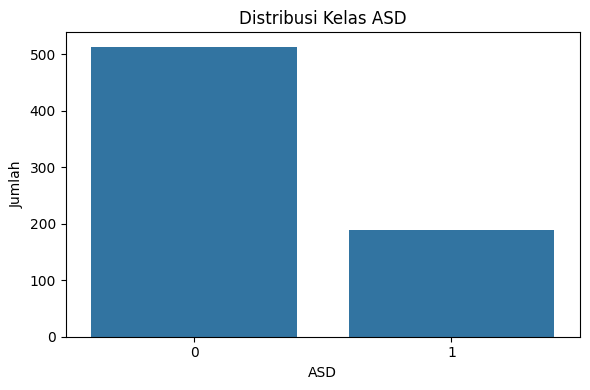

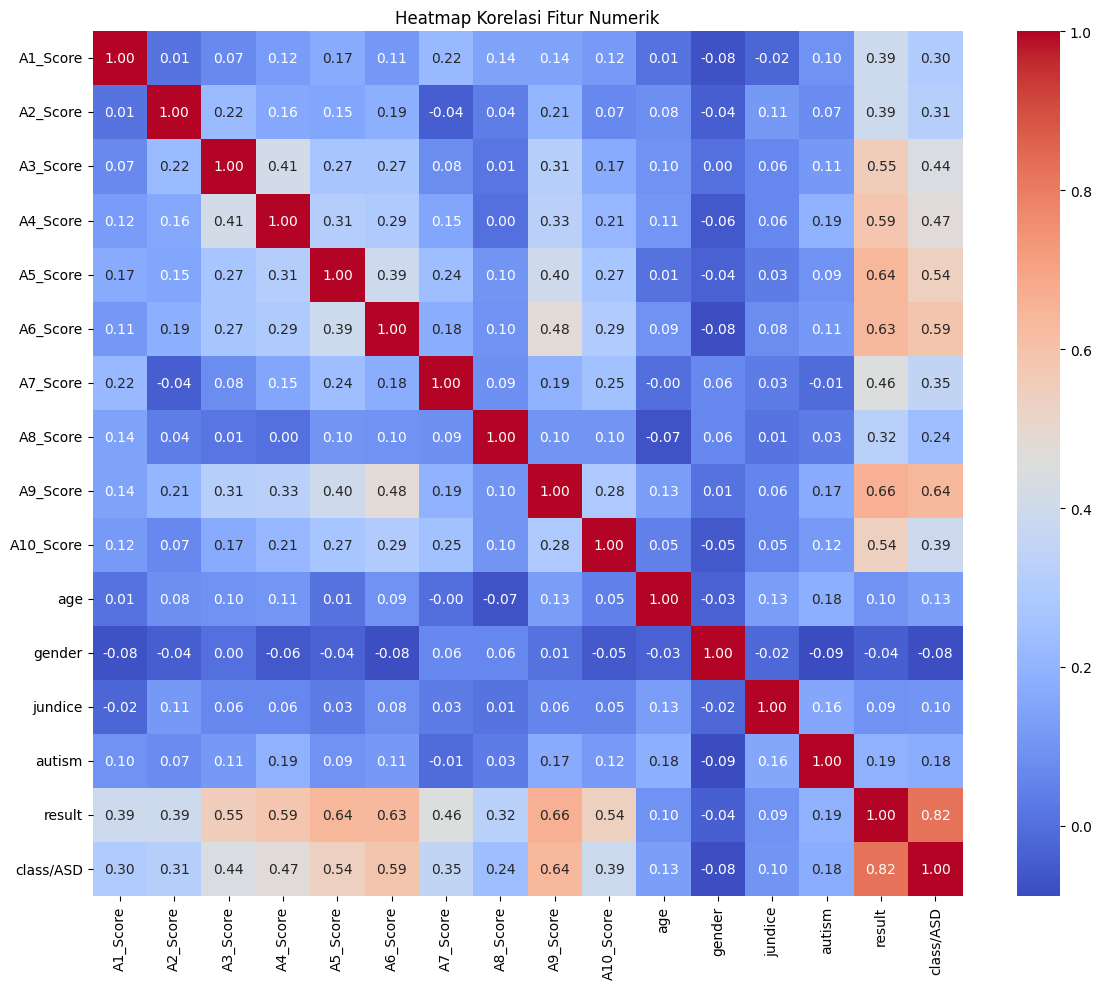

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('final_data_bersih.csv')

# Cek distribusi kelas
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class/ASD')
plt.title('Distribusi Kelas ASD')
plt.xlabel('ASD')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(12,10))
numerik = df.select_dtypes(include='number')  # ambil kolom numerik saja
corr = numerik.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()
